In [1]:
import torch
import numpy as np

In [2]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([ 1.1897, -0.8401, -0.3106], requires_grad=True)


In [3]:
y = x + 2
print(y)

tensor([3.1897, 1.1599, 1.6894], grad_fn=<AddBackward0>)


In [4]:
z = y + 3
z = z.mean()
print(z)

tensor(5.0130, grad_fn=<MeanBackward0>)


In [5]:
z.backward()  #dz / dx  --> simply to calculate the gradients by calling backward function

In [6]:
print(x.grad)

tensor([0.3333, 0.3333, 0.3333])


<h3> Example of a training loop </h3>

In [7]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()     #calculate gradients with respect to the weights.
    
    print(weights.grad)
    
    weights.grad.zero_()        #prevent gradients from being tracked. 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


<h3> Example on 1 forward and backward propagation </h3>

In [8]:
weight = torch.tensor(1.0, requires_grad = True)
x = torch.tensor(1.0)     #fixed
y = torch.tensor(2.0)     #fixed

y_hat = weight * x 

loss = (y_hat - y) ** 2       #loss function

loss.backward()          #gradient of the loss function with respect to weight
print(weight.grad)

tensor(-2.)


<h3> From Scratch using Numpy - Linear Regression </h3>

In [9]:
import numpy as np

X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([2,4,6,8], dtype = np.float32)

w = 0.0


#model prediction
def forward(x):
    return w * x


#loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


#gradient
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X,Y,y_pred)
    
    #update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


<h3> Using Pytorch </h3>

In [10]:
import torch

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
    return w * x


#loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    #update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')
print('\nNot as good as numpy because the backward propagation is not exact like the numpy')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

### Training Pipeline: Model, Loss and Optimizer 

In [11]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights


#Basically with PyTorch, we only need to know which 
#Loss and Optimizer we need to use.

import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

#don't need weights and forward fn anymore since PyTorch will help. 
#need to initialize a 2d array where the number of rows is the number of samples

#([4,1])
n_samples, n_features = X.shape  

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)       # 1 layer

#Design Model --------------------------------------------------------------

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)    

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


#Construct Loss and Optimizer -----------------------------------------------

loss = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


#Training Loop --------------------------------------------------------------

n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')
print('\nNot as good as numpy because the backward propagation is not exact like the numpy')

Prediction before training: f(5) = -4.755
epoch 1: w = -0.505, loss = 65.40409851
epoch 11: w = 1.354, loss = 1.81183910
epoch 21: w = 1.660, loss = 0.15959030
epoch 31: w = 1.717, loss = 0.11028229
epoch 41: w = 1.732, loss = 0.10282785
epoch 51: w = 1.742, loss = 0.09681591
epoch 61: w = 1.749, loss = 0.09118010
epoch 71: w = 1.757, loss = 0.08587293
epoch 81: w = 1.764, loss = 0.08087462
epoch 91: w = 1.771, loss = 0.07616736
Prediction after training: f(5) = 9.541

Not as good as numpy because the backward propagation is not exact like the numpy


### Linear Regression with PyTorch

epoch: 10, loss = 4362.2739
epoch: 20, loss = 3252.8452
epoch: 30, loss = 2450.8691
epoch: 40, loss = 1870.4845
epoch: 50, loss = 1450.0214
epoch: 60, loss = 1145.1177
epoch: 70, loss = 923.8140
epoch: 80, loss = 763.0543
epoch: 90, loss = 646.1860
epoch: 100, loss = 561.1660


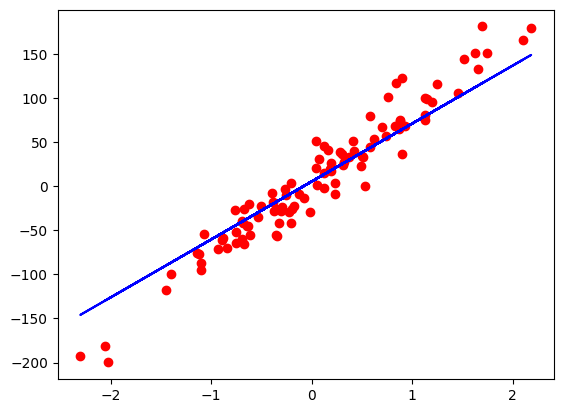

In [12]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #reshape tensor

n_samples, n_features = X.shape  #([100,1])

#1) model
input_size = n_features
output_size = 1        #each sample that we put in, our model gets 1 output.
model = nn.Linear(input_size, output_size)

#2) loss and optimizer

criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    #empty gradients because whenever we call the backward, it will sum up the gradients into the dot product attribute
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
    
#plot
predicted = model(X).detach().numpy() #detach to remove the require gradient in Tensor so that we can convert into numpy.
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### Logistic Regression using PyTorch

In [13]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets   # to load binary classification dataset.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#0) prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape     #([569, 30])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)   #put each value in 1 row, with total only 1 column.
y_test = y_test.view(y_test.shape[0], 1)   


#1) model
# f = wx + b, sigmoid at the end

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)   #first we apply the linear layer
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))    #then, we apply the sigmoid function
        return y_predicted

model = LogisticRegression(n_features)


#2) loss and optimizer
criterion = nn.BCELoss() #binary cross entrophy loss
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    
    #forward pass and loss calculation
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    #backward pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    #zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
with torch.no_grad():      #Evaluation should not be part of our computational graph where we want to track the history, so we remove the gradient tracking.
    y_predicted = model(X_test)
    y_predicted_classes = y_predicted.round() #those above 0.5 turn to 1. somemore, if we don't use the no_grad above, we cannot do this, since got require_grad.
    acc = y_predicted_classes.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.6674
epoch: 20, loss = 0.5214
epoch: 30, loss = 0.4361
epoch: 40, loss = 0.3810
epoch: 50, loss = 0.3422
epoch: 60, loss = 0.3133
epoch: 70, loss = 0.2907
epoch: 80, loss = 0.2725
epoch: 90, loss = 0.2574
epoch: 100, loss = 0.2446
accuracy = 0.9123


### DataLoader and Dataset

In [14]:
'''
epoch = 1 forward and backward pass of ALL training samples

batch_size = number of training samples in one forward & backward pass

number of interations = number of passes, each pass using [batch_size] number of samples

e.g. 100 samples, batch_size=20 ---> 100/20 = 5 iterations for 1 epoch
'''

'\nepoch = 1 forward and backward pass of ALL training samples\n\nbatch_size = number of training samples in one forward & backward pass\n\nnumber of interations = number of passes, each pass using [batch_size] number of samples\n\ne.g. 100 samples, batch_size=20 ---> 100/20 = 5 iterations for 1 epoch\n'

In [15]:
xy = np.loadtxt('./wine.csv', delimiter = ',', dtype = np.float32, skiprows = 1)

In [16]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    
    def __init__(self):
        #data loading
        xy = np.loadtxt('./wine.csv', delimiter = ',', dtype = np.float32, skiprows = 1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]
        
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]    #The [] operator is essentially shorthand for calling the __getitem__ method on the object.
    
    def __len__(self):
        return self.n_samples
    
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [17]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True)     
datatiter = iter(dataloader)
data = next(datatiter)
features, labels = data
print(features, labels)

tensor([[1.4750e+01, 1.7300e+00, 2.3900e+00, 1.1400e+01, 9.1000e+01, 3.1000e+00,
         3.6900e+00, 4.3000e-01, 2.8100e+00, 5.4000e+00, 1.2500e+00, 2.7300e+00,
         1.1500e+03],
        [1.3630e+01, 1.8100e+00, 2.7000e+00, 1.7200e+01, 1.1200e+02, 2.8500e+00,
         2.9100e+00, 3.0000e-01, 1.4600e+00, 7.3000e+00, 1.2800e+00, 2.8800e+00,
         1.3100e+03],
        [1.3710e+01, 1.8600e+00, 2.3600e+00, 1.6600e+01, 1.0100e+02, 2.6100e+00,
         2.8800e+00, 2.7000e-01, 1.6900e+00, 3.8000e+00, 1.1100e+00, 4.0000e+00,
         1.0350e+03],
        [1.1790e+01, 2.1300e+00, 2.7800e+00, 2.8500e+01, 9.2000e+01, 2.1300e+00,
         2.2400e+00, 5.8000e-01, 1.7600e+00, 3.0000e+00, 9.7000e-01, 2.4400e+00,
         4.6600e+02]]) tensor([[1.],
        [1.],
        [1.],
        [2.]])


In [18]:
# training loop

num_epochs = 2
total_samples = len(dataset)                     #178
n_iterations = math.ceil(total_samples / 4)      #total 45 batches, since batch_size = 4
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

178 45
Epoch: 1/2, Batch 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Batch 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Batch 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Batch 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Batch 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Batch 20/45| Inputs tor

### Dataset Transforms 

In [19]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms: 
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda 

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
                               
torchvision.transforms.ReScale(256)
torchvision.transforms.ToTensor()  ----> most common!
'''

'\nTransforms can be applied to PIL images, tensors, ndarrays, or custom data\nduring creation of the DataSet\n\ncomplete list of built-in transforms: \nhttps://pytorch.org/docs/stable/torchvision/transforms.html\n\nOn Images\n---------\nCenterCrop, Grayscale, Pad, RandomAffine\nRandomCrop, RandomHorizontalFlip, RandomRotation\nResize, Scale\n\nOn Tensors\n----------\nLinearTransformation, Normalize, RandomErasing\n\nConversion\n----------\nToPILImage: from tensor or ndrarray\nToTensor : from numpy.ndarray or PILImage\n\nGeneric\n-------\nUse Lambda \n\nCustom\n------\nWrite own class\n\nCompose multiple Transforms\n---------------------------\ncomposed = transforms.Compose([Rescale(256),\n                               RandomCrop(224)])\n                               \ntorchvision.transforms.ReScale(256)\ntorchvision.transforms.ToTensor()  ----> most common!\n'

In [20]:
class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        xy = np.loadtxt('./wine.csv', delimiter = ',', dtype = np.float32, skiprows = 1)
        
        self.n_samples = xy.shape[0]
        
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        
        self.transform = transform
                
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]    #The [] operator is essentially shorthand for calling the __getitem__ method on the object.
    
        if self.transform:                       #if transform attribute is available. 
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):
        return self.n_samples

In [21]:
#write our own transform

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [22]:
dataset = WineDataset(transform = ToTensor())
features, labels = dataset[0]
type(features)        #tensor

torch.Tensor

In [23]:
class MulTransform:
    def __init__(self,factor):
        self.factor = factor
        
    def __call__(self,sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target         #tuple.
    
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])    #torchvision.transforms.Compose is a function provided by PyTorch's torchvision library that allows you to create a composition of multiple image transformation functions.
dataset = WineDataset(transform = composed)
dataset[0]

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

### Softmax and Cross-Entropy

#### From scratch using Numpy - Softmax

In [24]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


#### Using PyTorch - Softmax

In [25]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, axis = 0)
print('softmax tensor:', outputs)

softmax tensor: tensor([0.6590, 0.2424, 0.0986])


#### From scratch using Numpy - cross entropy loss

In [27]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss / float(predicted.shape[0])

Y = np.array([1,0,0])     # Y must be one-hot encoded

Y_hat = np.array([0.7, 0.2, 0.1])   

l1 = cross_entropy(Y, Y_hat)

print(f'Loss1 numpy: {l1:.4f}')

Loss1 numpy: 0.1189


#### Using PyTorch - Cross Entropy Loss

In [28]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])            # must be class label, not one hot-encoded!

# nsamples x nclasses = 1 x 3
Y_hat = torch.tensor([[2.0, 1.0, 0.1]])    #raw scores from logit, didnt apply softmax.

l1 = loss(Y_hat, Y)

print(l1.item())    #good score cos class label 0 does indeed have the highest score of 2.0


# to get the actual prediction label
_, prediction = torch.max(Y_hat, 1)  #_ because we don't need the first output, then 1 because along the 1 dimension.

print(prediction)

0.4170299470424652
tensor([0])


In [29]:
# 3 samples
Y = torch.tensor([2,0,1])

# nsamples x nclasses = 3x3
Y_hat = torch.tensor([[2.0, 1.0, 4.1],
                     [2.0, 1.0, 0.1],
                     [2.0, 5.0, 0.1]])

l1 = loss(Y_hat, Y)

print(l1.item())    

_, prediction = torch.max(Y_hat, 1)  

print(prediction)

0.20918504893779755
tensor([2, 0, 1])


### Neural Network example in PyTorch for Multiclass Problem

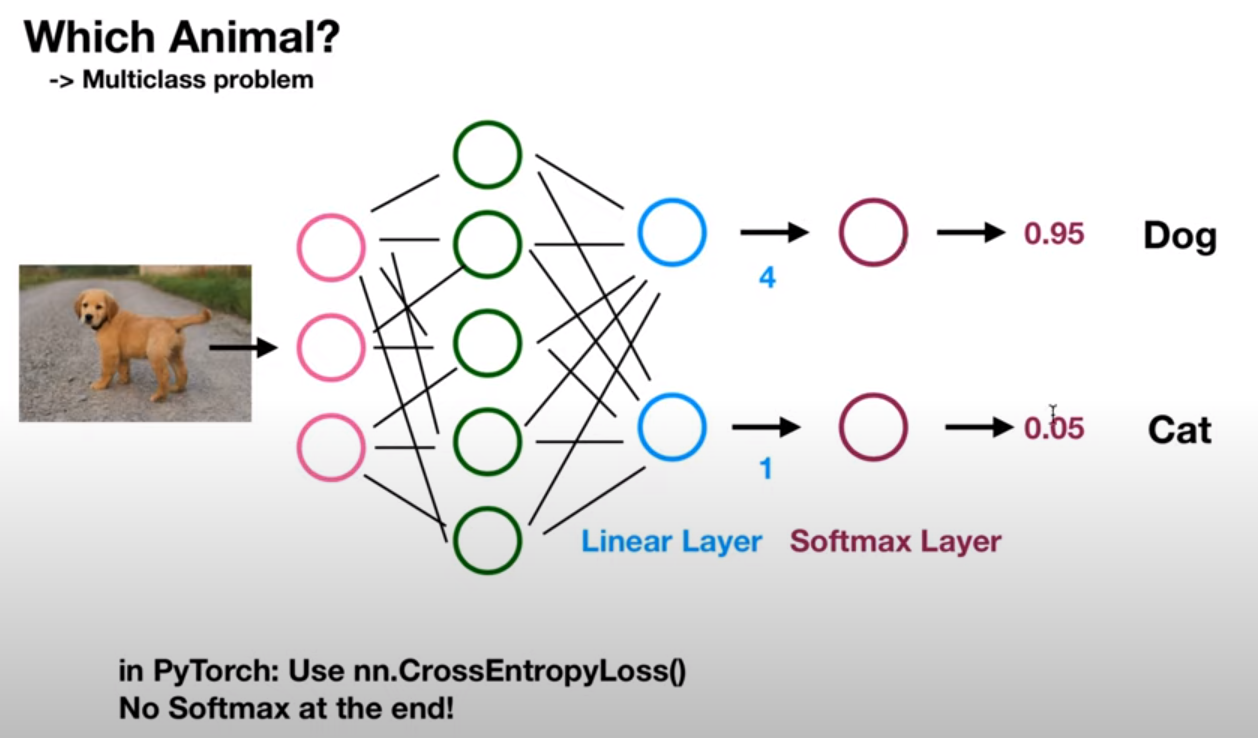

In [30]:
import torch
import torch.nn as nn

#Multiclass problem

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)    #linear layer
        self.relu = nn.ReLU()                                #activation function
        self.linear2 = nn.Linear(hidden_size, num_classes)   #final linear layer
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        #no softmax at the end since we use the nn.CrossEntropyLoss in pyTorch
        return out

model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)     #This means that the hidden layer will have 5 neurons, and the output of this hidden layer will be passed through the ReLU activation function (self.relu) before being sent to the next layer.
criterion = nn.CrossEntropyLoss()  #applies softmax

### Neural Network example in PyTorch for Binary Problem

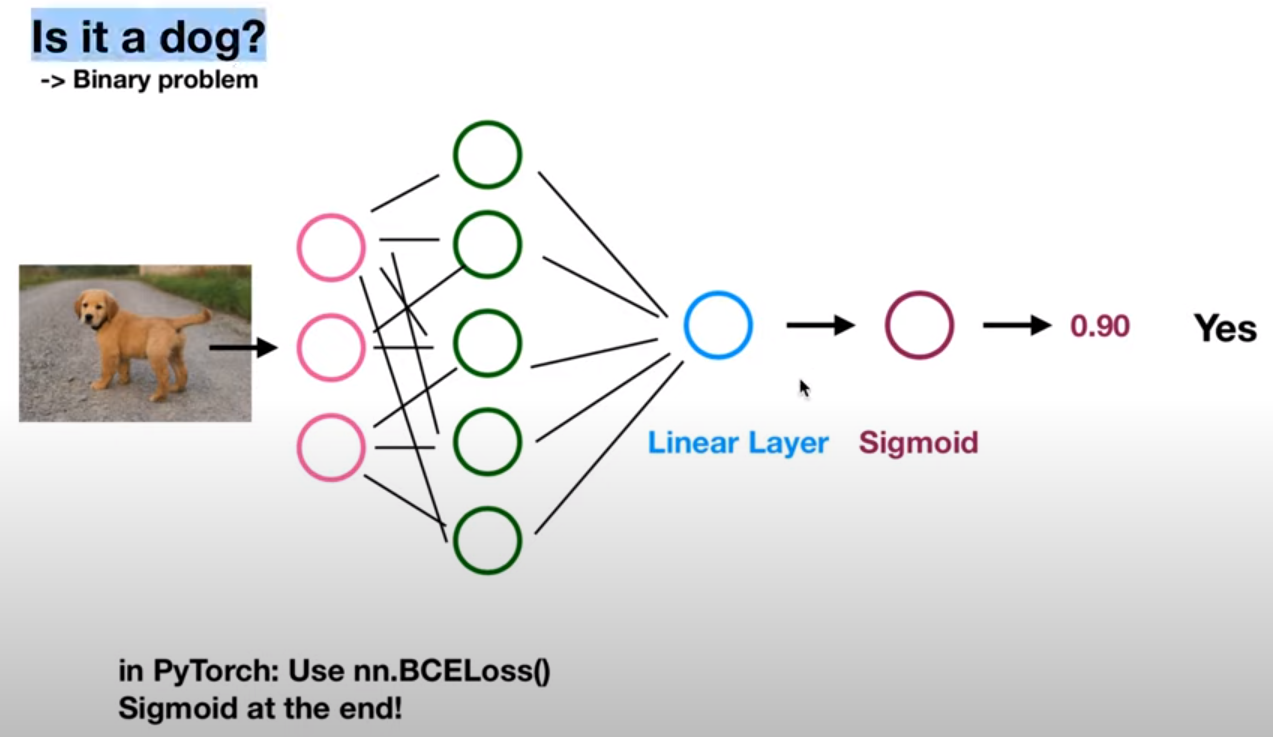

In [31]:
import torch
import torch.nn as nn

#Binary problem

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)    #linear layer
        self.relu = nn.ReLU()                                #activation function
        self.linear2 = nn.Linear(hidden_size, 1)   #since binary, hence 1.
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        #sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes=1)
criterion = nn.CrossEntropyLoss()  #applies softmax

### Activation Functions

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # initial linear layer
        self.relu = nn.ReLU()                              # relu activation function         
        self.linear2 = nn.Linear(hidden_size, 1)           # 2nd linear layer
        self.sigmoid = nn.Sigmoid()                        # sigmoid activation function
    
    def forward(self, x):
        out = self.linear1(x)        
        out = self.relu(out)         
        out = self.linear2(out)      
        out = self.sigmoid(out)      
        return out

#option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  # initial linear layer
        self.linear2 = nn.Linear(hidden_size, 1)           # 2nd linear layer
    
    def forward(self, x):      
        out = torch.relu(self.linear1(x))            
        out = torch.sigmoid(self.linear2(out))   
        return out

### Feed-Forward Neural Network - MNIST digit classification full

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100 / 600, loss = 0.3107
epoch 1 / 2, step 200 / 600, loss = 0.4306
epoch 1 / 2, step 300 / 600, loss = 0.2556
epoch 1 / 2, step 400 / 600, loss = 0.2069
epoch 1 / 2, step 500 / 600, loss = 0.1792
epoch 1 / 2, step 600 / 600, loss = 0.2450
epoch 2 / 2, step 100 / 600, loss = 0.2615
epoch 2 / 2, step 200 / 600, loss = 0.1407
epoch 2 / 2, step 300 / 600, loss = 0.0898
epoch 2 / 2, step 400 / 600, loss = 0.1308
epoch 2 / 2, step 500 / 600, loss = 0.2316
epoch 2 / 2, step 600 / 600, loss = 0.0889
accuracy = 95.27


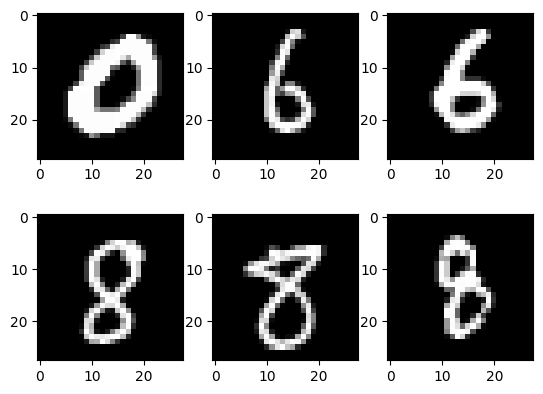

In [44]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 28*28
hidden_size = 100    #can play around with the number
num_classes = 10     #digit from 0 to 9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train = False,
                                          transform=transforms.ToTensor(),
                                          download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size = batch_size,
                                           shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)  #[100,1,28,28] -> we have batch size of 100, 1 colored channel of 28 by 28 pixels 

for i in range(6):
    plt.subplot(2,3, i+1)     # 2 rows, 3 columns and index (i + 1)
    plt.imshow(samples[i][0], cmap = 'gray')

# plt.show()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        #no softmax here because i will use the nn.crossentropyloss which already apply the softmax layer.
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss() #apply softmax for me
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784 --> need to reshape to become this cos only take vector.
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        #forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}')
    
#test 
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

### Convolutional Neural Network (CNN)

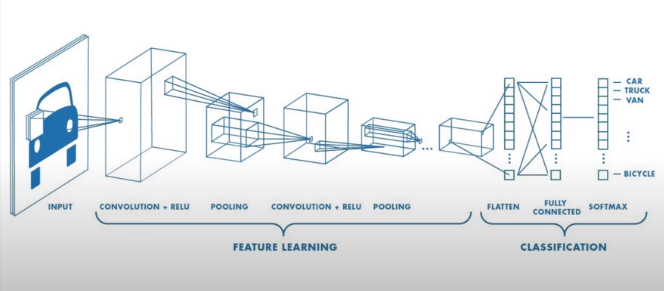

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                          train = False,
                                          transform=transforms.ToTensor(),
                                          download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size = batch_size,
                                           shuffle = False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)     #3 color channels, 6 output channels, 5 kernel size
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)      #input has to be equal to last output channel size 6
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)        #final output has to be 10, since 10 different classes
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))    #convolutional layer with activation function and pooling layer.
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)     #flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)    #no activation function at the end because already including in CrossEntropyLoss below
        return x
            
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        #forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}')
        
print('Finished Training')   

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the entire network = {acc} %')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]} : {acc} %')
    
    

Files already downloaded and verified
Files already downloaded and verified
epoch 1 / 4, step 2000 / 12500, loss = 2.3067
epoch 1 / 4, step 4000 / 12500, loss = 2.3106
epoch 1 / 4, step 6000 / 12500, loss = 2.3163
epoch 1 / 4, step 8000 / 12500, loss = 2.2874
epoch 1 / 4, step 10000 / 12500, loss = 2.3087
epoch 1 / 4, step 12000 / 12500, loss = 2.2798
epoch 2 / 4, step 2000 / 12500, loss = 2.3335
epoch 2 / 4, step 4000 / 12500, loss = 2.2289
epoch 2 / 4, step 6000 / 12500, loss = 2.2563
epoch 2 / 4, step 8000 / 12500, loss = 2.0755
epoch 2 / 4, step 10000 / 12500, loss = 2.0865
epoch 2 / 4, step 12000 / 12500, loss = 2.2359
epoch 3 / 4, step 2000 / 12500, loss = 2.3390
epoch 3 / 4, step 4000 / 12500, loss = 1.9403
epoch 3 / 4, step 6000 / 12500, loss = 1.9212
epoch 3 / 4, step 8000 / 12500, loss = 1.8575
epoch 3 / 4, step 10000 / 12500, loss = 1.8946
epoch 3 / 4, step 12000 / 12500, loss = 1.9998
epoch 4 / 4, step 2000 / 12500, loss = 1.5347
epoch 4 / 4, step 4000 / 12500, loss = 1.258